In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy and pandas packages
import numpy as np
import pandas as pd

# import matplotlib and seaborn packages for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data from csv file
uber = pd.read_csv("C:/PGDDS/uber_supply_demand/Uber Request Data.csv", encoding = 'utf-8')
uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# Inspecting Data

In [4]:
# Information about dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
# To check no.of rows and columns in dataset
uber.shape

(6745, 6)

In [6]:
# To verify if any duplicate row is present or not
uber.duplicated(subset = ['Request id']).sum()

0

In [7]:
# Column wise count of Null values
uber_null_count = uber.isnull().sum()
print(uber_null_count)
print("\n")

# Column wise percentage of Null values
uber_null_per = round(100*(uber.isnull().sum()/len(uber.index)),2)
print(uber_null_per)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64


# Data Cleaning and Preparation

### Ensuring Date and time are in proper format

In [8]:
# Converting Request timestamp and drop timestamp from object to datetime type
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst = True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst = True)
uber[['Request timestamp','Drop timestamp']].head(5)

,Request timestamp,Drop timestamp
0,2016-07-11 11:51:00,2016-07-11 13:00:00
1,2016-07-11 17:57:00,2016-07-11 18:47:00
2,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2016-07-12 21:08:00,2016-07-12 22:03:00
4,2016-07-13 08:33:16,2016-07-13 09:25:47


In [9]:
# Checking whether Date and time are in proper foramt
uber.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

### Deriving new variables for analysis

In [10]:
# Extracting Days and hour from request timestamp
uber['request_day'] = uber['Request timestamp'].dt.day
uber['request_hour'] = uber['Request timestamp'].dt.hour
uber[['request_day','request_hour']].head()

,request_day,request_hour
0,11,11
1,11,17
2,12,9
3,12,21
4,13,8


In [11]:
# Number of request for each day for each status i.e Cancelled, No cars available, Trip completed
req_count = uber.groupby(['request_day','Status'])['request_hour'].count()
req_count

request_day  Status           
11           Cancelled            262
             No Cars Available    504
             Trip Completed       601
12           Cancelled            240
             No Cars Available    505
             Trip Completed       562
13           Cancelled            270
             No Cars Available    490
             Trip Completed       577
14           Cancelled            252
             No Cars Available    571
             Trip Completed       530
15           Cancelled            240
             No Cars Available    580
             Trip Completed       561
Name: request_hour, dtype: int64

#### Reason to choose Catplot is that it can show relationship between a numerical and one or more categorical variables 

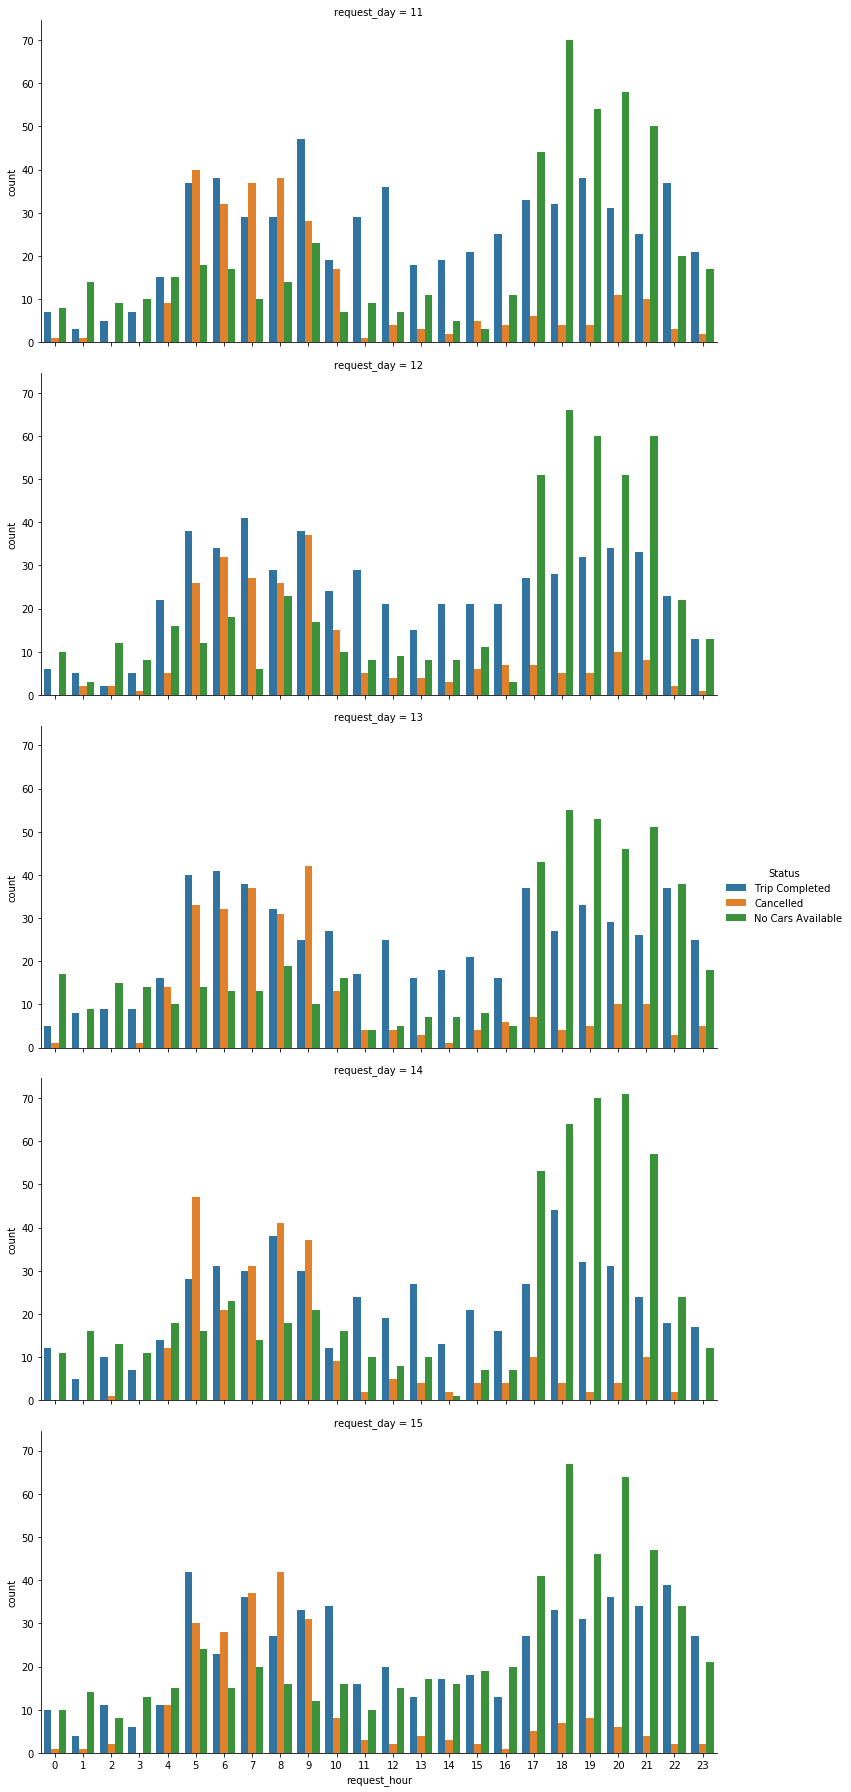

In [12]:
# Plot for count of no. of request received everyday for every hour and all status
sns.catplot(x="request_hour", hue="Status", data=uber, row="request_day", kind="count", height=5, aspect=2)
plt.show()

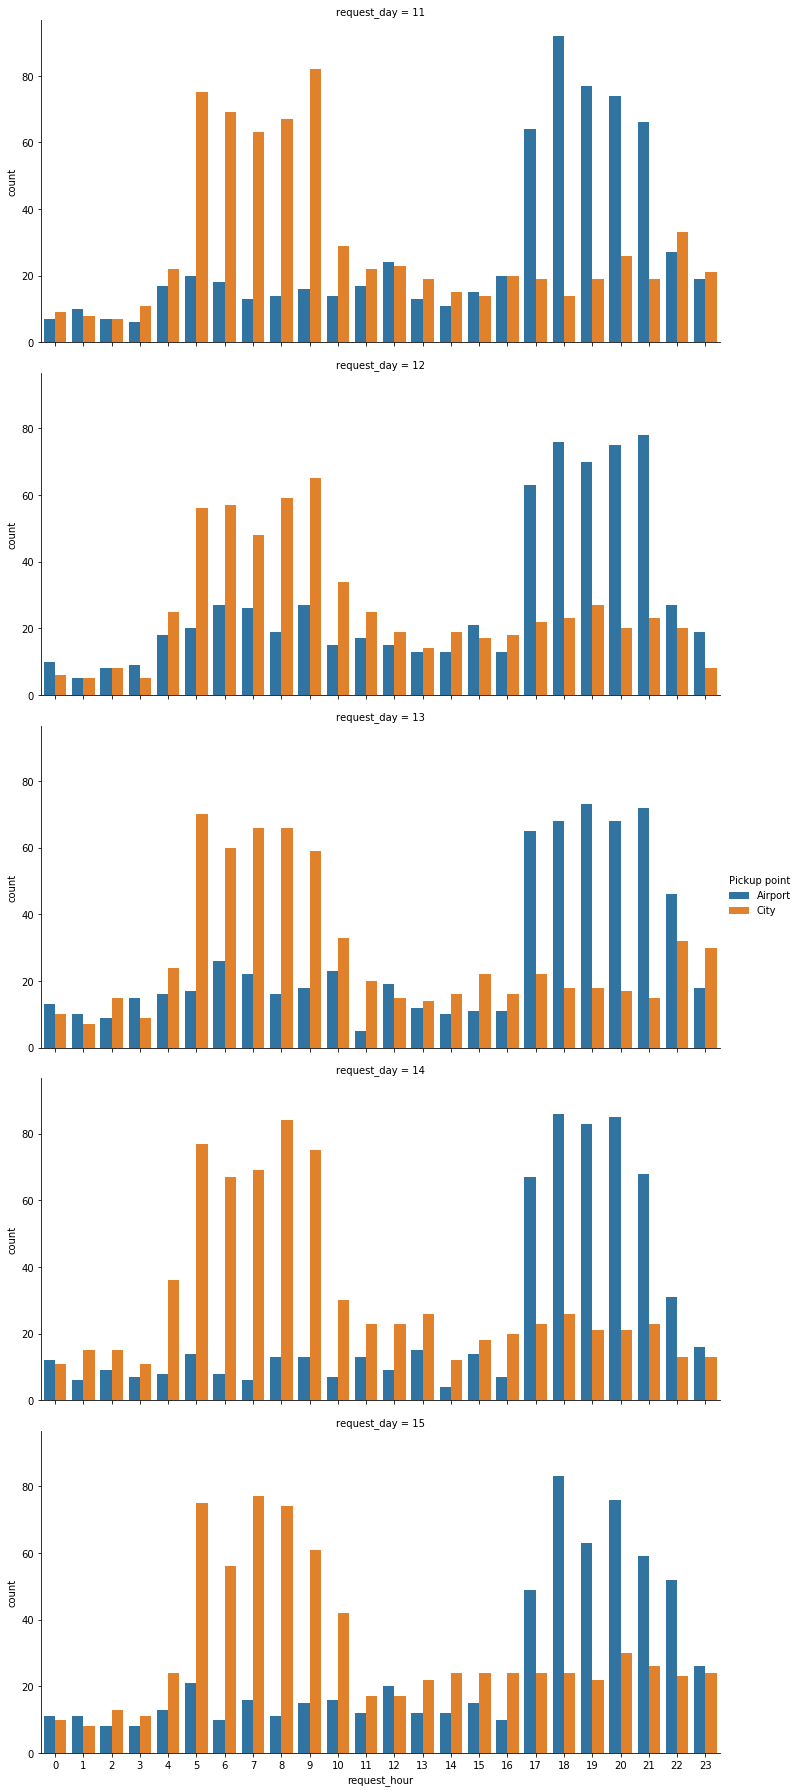

In [13]:
# Plot for count of no. of request received everyday for every hour and all pickup point(i.e Airport and City)
sns.catplot(x="request_hour", hue="Pickup point", data=uber, row="request_day", kind="count", height=5, aspect=2)
plt.show()

In [14]:

# Assumption:- Hour can only take integer value, it cannot take value as 3.5 or 4.5 etc.

# User-defined function to break 24 hours of a day into time slots to understand the distribution of request

def time_slot(x):
    if x >= 3 and x < 6:
        return "Early_morning"  # 3am-5am
    elif x >= 6 and x < 11:
        return "Morning"        # 6am-10am
    elif x >= 11 and x < 17:
        return "Day"            # 11am-4pm
    elif x >= 17 and x < 22:
        return "Evening"        # 5pm-9pm
    else:
        return "Late_night"     # 10pm-2am

# Note:- Each hour of day is covered in above breakup of time slots. There is no need to overlap hour like 3am-6am and 
#        6am to 10am because hour only has integer values.

uber['time_slot'] = uber['request_hour'].apply(lambda x: time_slot(x))
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_day,request_hour,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,Early_morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11,6,Morning


In [15]:
# count of no. of request received in different time slots of a day
count_time_slot = uber.groupby('time_slot')['request_day'].count().sort_values(ascending=False)
count_time_slot

time_slot
Evening          2342
Morning          1901
Day               981
Late_night        781
Early_morning     740
Name: request_day, dtype: int64

# Identification of most pressing problem

## Problematic types of requests and the time slots

#### Reason to choose barplot is that it shows the distribution of values at each level of the categorical variables 

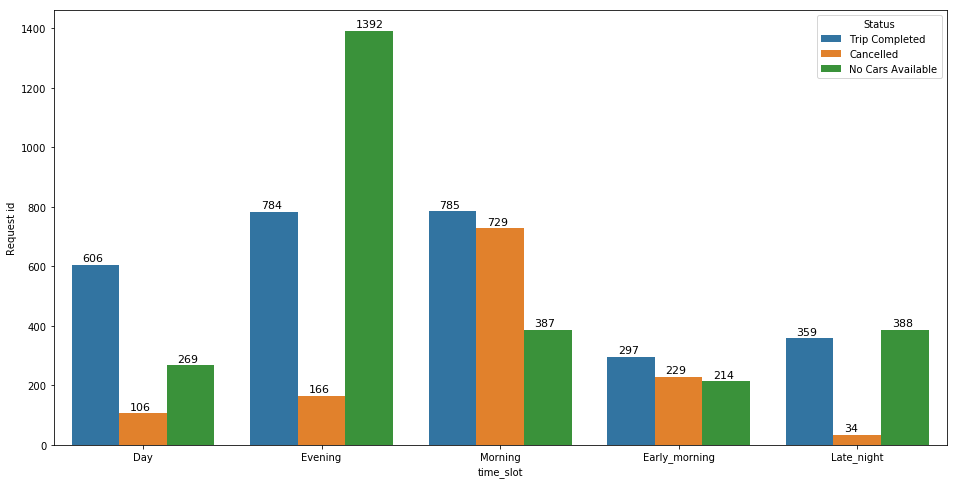

In [16]:
# Plot for count of no. of request against different time slots for different status
plt.figure(figsize=(16,8))

# Bar plot
ax = sns.barplot(x = 'time_slot', y ='Request id', hue='Status', data=uber, estimator=lambda req_id: len(req_id))

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+10,int(i.get_height()), fontsize=11)

plt.show()

#### Reason to choose countplot is that it shows the counts of observations in each categorical bin using bars. 
#### We can use barplot also instead of countplot.

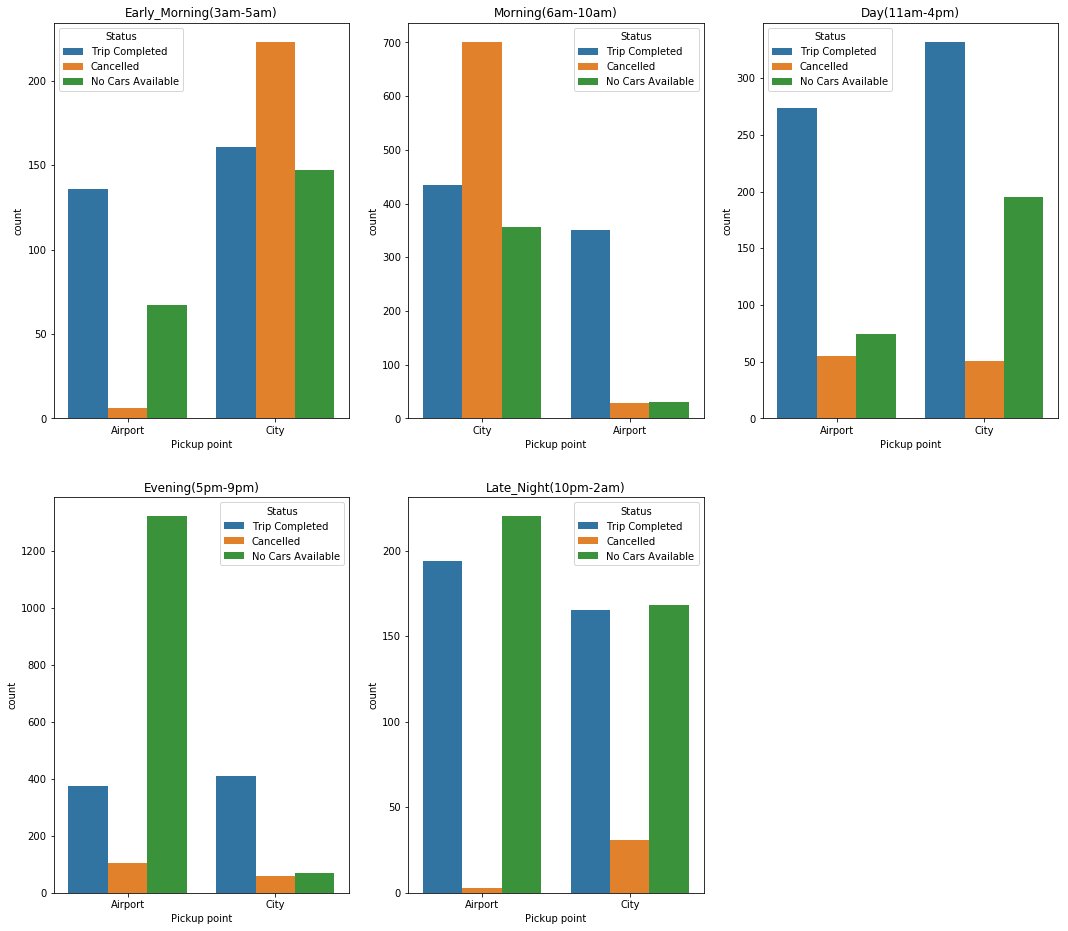

In [17]:
# Plots for count of no. of request against different pickup point (i.e Airport and City) for every time slots

# Defining figure and axes for subplots
fig,ax = plt.subplots(2,3,figsize=(18,16))


# Plot for time slot of Early_morning(3am-5am) 
early_morning_df = uber[uber['time_slot'] == 'Early_morning']
sns.countplot(x='Pickup point', hue='Status', data=early_morning_df,ax=ax[0,0] )
ax[0,0].set_title('Early_Morning(3am-5am)')


# Plot for time slot of Morning(6am-10am)
morning_df = uber[uber['time_slot'] == 'Morning']
sns.countplot(x='Pickup point', hue='Status', data=morning_df, ax=ax[0,1])
ax[0,1].set_title('Morning(6am-10am)')


# Plot for time slot of Day(11am-4pm)
day_df = uber[uber['time_slot'] == 'Day']
sns.countplot(x='Pickup point', hue='Status', data=day_df,ax=ax[0,2])
ax[0,2].set_title('Day(11am-4pm)')


# Plot for time slot of Evening(5pm-9pm)
evening_df = uber[uber['time_slot'] == 'Evening']
sns.countplot(x='Pickup point', hue='Status', data=evening_df, ax=ax[1,0])
ax[1,0].set_title('Evening(5pm-9pm)')


# Plot for time slot of Late_night(10pm-2am)
late_night_df = uber[uber['time_slot'] == 'Late_night']
sns.countplot(x='Pickup point', hue='Status', data=late_night_df, ax=ax[1,1])
ax[1,1].set_title('Late_Night(10pm-2am)')

# Deleting extra axis
fig.delaxes(ax[1,2])

plt.show()

### From above plots two problems found
1. No. of trips cancelled are high during Morning (6am-10am) when pickup point is City 
   and drop point is Airport.
2. No cars availablity is high during Evening (5pm-9pm) when pickup point is Airport and drop point is City.

So we can infer two things
1. **City** as pickup point during **Morning (6am-10am)** timeslot **Trip Cancelled is problematic requests**
2. **Airport** as pickup point during **Evening (5pm-9pm)** timeslot **No cars available is  problematic requests**

# Supply and Demand of cabs

#### Barplot is used to show all supply demand related plot.
#### Reason to choose barplot is that it shows the distribution of values at each level of the categorical variables 

In [18]:
# Count of no. of request for different time_slot for all pickup point (i.e Airport and City)
timeslot_pickuppoint = uber.groupby(['time_slot','Pickup point'])['Request id'].count().unstack()
timeslot_pickuppoint

Pickup point,Airport,City
time_slot,,
Day,403,578
Early_morning,209,531
Evening,1800,542
Late_night,417,364
Morning,409,1492


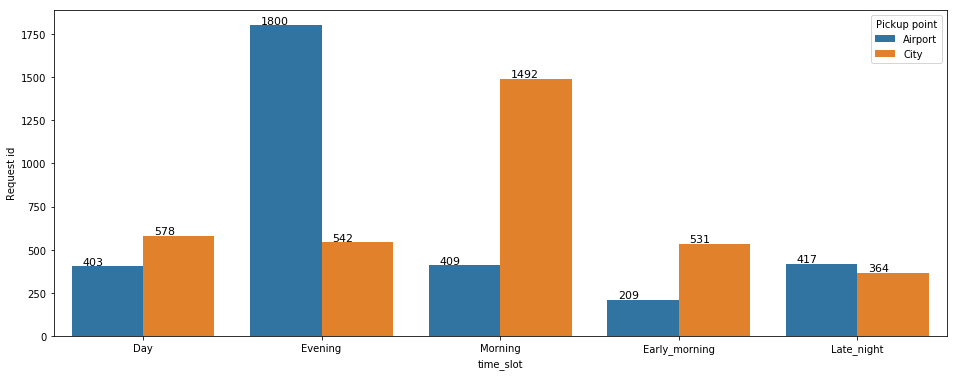

In [19]:
# Number of request for each time slot for all pickup point (i.e Airport and City)
plt.figure(figsize=(16,6))
ax = sns.barplot(x = 'time_slot', y = 'Request id', hue='Pickup point', data=uber, estimator=lambda req_id: len(req_id))

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+10,int(i.get_height()), fontsize=11)
    
plt.show()

In [20]:
# Count of no. of request for different time_slot for different pickup point(i.e Airport and City) and various status
timeslot_pickup = uber.groupby(['time_slot','Pickup point','Status'])['Request id'].count().unstack()
timeslot_pickup

Status                      Cancelled  No Cars Available  Trip Completed
time_slot     Pickup point                                              
Day           Airport              55                 74             274
              City                 51                195             332
Early_morning Airport               6                 67             136
              City                223                147             161
Evening       Airport             106               1321             373
              City                 60                 71             411
Late_night    Airport               3                220             194
              City                 31                168             165
Morning       Airport              28                 31             350
              City                701                356             435

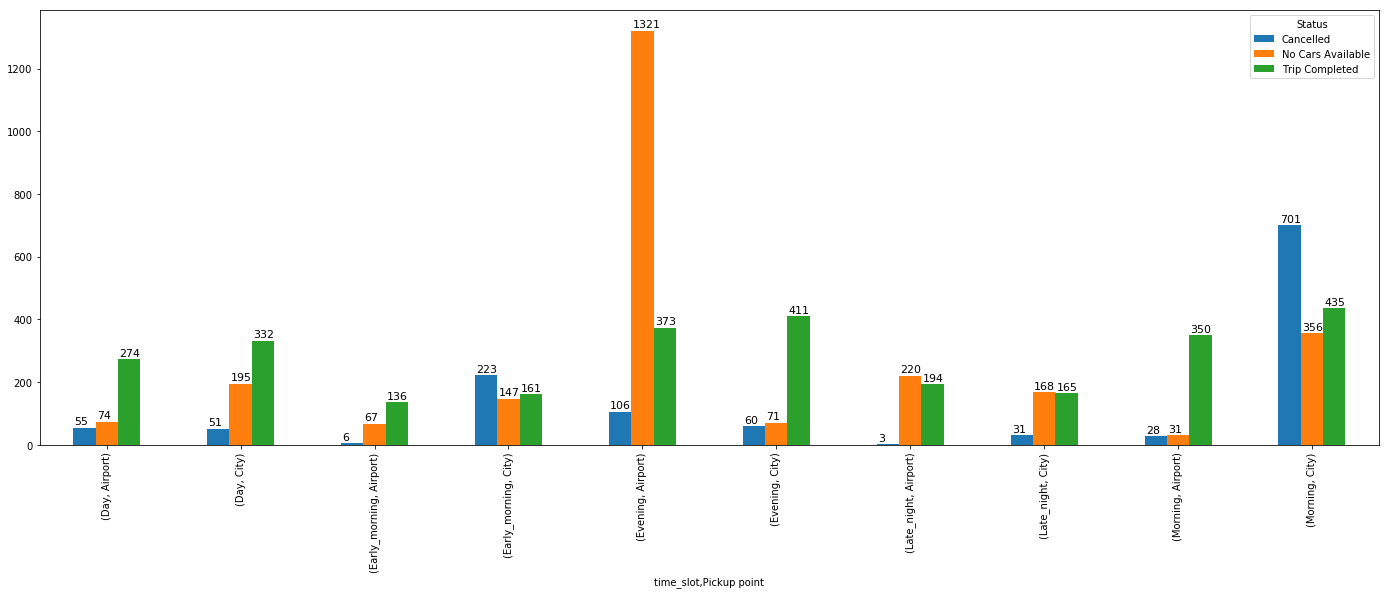

In [21]:
# Plot for no. of request at different time slot and pickup point(i.e Airport and City) against all status
fig,ax = plt.subplots(figsize=(24,8))
timeslot_pickup.plot(kind="bar", ax=ax)

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+10,int(i.get_height()), fontsize=11)
    
plt.show()

## Supply-Demand Gap Calculation

In [22]:
# Frequency(count) of request in different time slots of a day
count_time_slot = uber.groupby('time_slot')['request_day'].count().sort_values(ascending=False)
count_time_slot

time_slot
Evening          2342
Morning          1901
Day               981
Late_night        781
Early_morning     740
Name: request_day, dtype: int64

### Gap Calculation for time slots where highest gap exists

In [23]:
# Calculating Supply-demand gap for different time slots

supply_demand_ts = uber.groupby(['time_slot','Status'])['Request id'].count().unstack()

# Calculating Demand i.e Total request by adding all the request and making new column to store
supply_demand_ts['Demand(Total_Request)'] = supply_demand_ts['Cancelled'] + supply_demand_ts['No Cars Available'] + \
                                            supply_demand_ts['Trip Completed']
    
# Calculating Supply i.e Trip Completed and making new column to store
supply_demand_ts['Supply(Trip_Completed)'] = supply_demand_ts['Trip Completed']


# Calculating Supply-demand gap i.e (Total request - Trip completed)
supply_demand_ts['Supply_Demand_Gap'] = supply_demand_ts['Demand(Total_Request)'] - supply_demand_ts['Trip Completed']


# Removing column not required for plots
supply_demand_ts = supply_demand_ts.drop(['Cancelled','No Cars Available','Trip Completed'],axis=1)

supply_demand_ts

Status,Demand(Total_Request),Supply(Trip_Completed),Supply_Demand_Gap
time_slot,,,
Day,981,606,375
Early_morning,740,297,443
Evening,2342,784,1558
Late_night,781,359,422
Morning,1901,785,1116


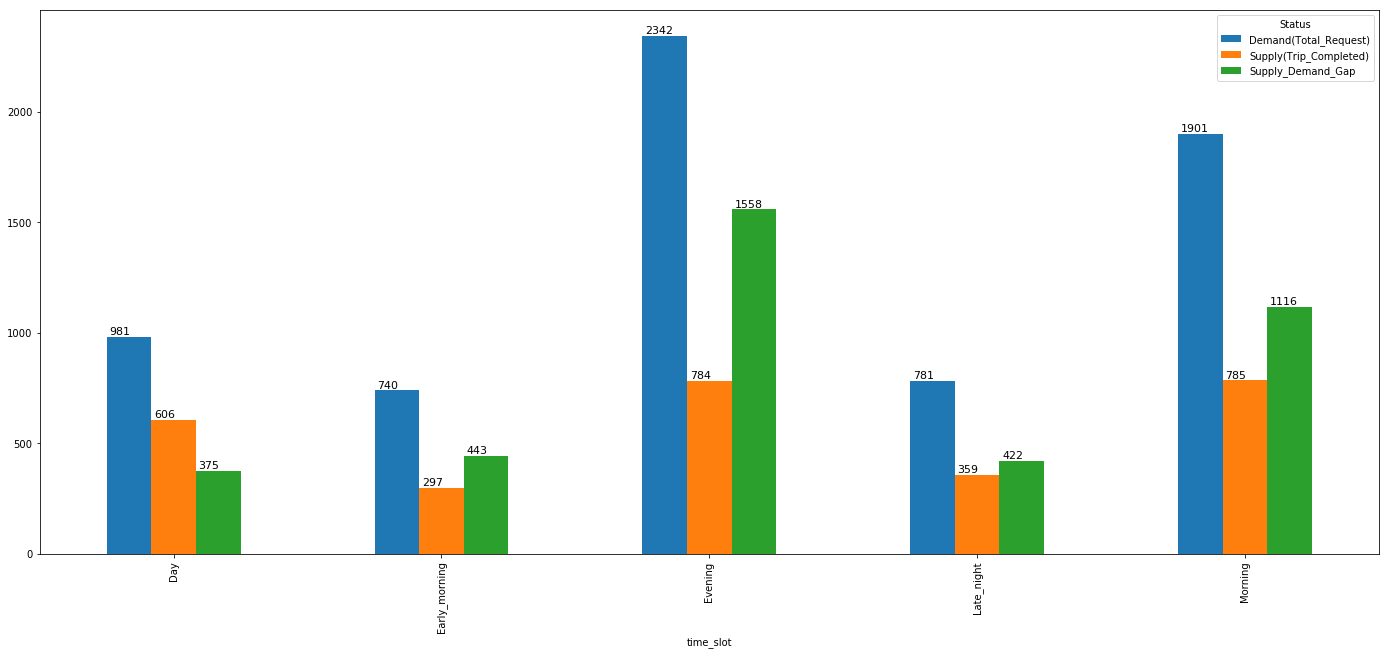

In [24]:
# Plot for supply-demand gap for different time slots
fig,ax = plt.subplots(figsize=(24,10))
supply_demand_ts.plot(kind="bar", ax=ax)

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+10,int(i.get_height()), fontsize=11)
    
plt.show()

#### From the above calculation and plots we can say high gap exists during
        1. Morning time slot
        2. Evening time slot

### Gap Calculation for types of requests where gap is the most severe in identified time slots

In [25]:
# Calculating Supply-demand gap for pickup point i.e Airport and City

supply_demand_pickup = uber.groupby(['time_slot','Pickup point','Status'])['Request id'].count().unstack()

# Calculating Demand i.e Total request by adding all the request and making new column to store
supply_demand_pickup['Demand(Total_Request)'] = supply_demand_pickup['Cancelled'] + supply_demand_pickup['No Cars Available'] + \
                                                supply_demand_pickup['Trip Completed']
    
# Calculating Supply i.e Trip Completed and making new column to store
supply_demand_pickup['Supply(Trip_Completed)'] = supply_demand_pickup['Trip Completed']


# Calculating Supply-demand gap i.e (Total request - Trip completed)
supply_demand_pickup['Supply_Demand_Gap'] = supply_demand_pickup['Demand(Total_Request)'] - supply_demand_pickup['Trip Completed']


# Removing column not required for plots
supply_demand_pickup = supply_demand_pickup.drop(['Cancelled','No Cars Available','Trip Completed'],axis=1)

supply_demand_pickup

Status                      Demand(Total_Request)  Supply(Trip_Completed)  \
time_slot     Pickup point                                                  
Day           Airport                         403                     274   
              City                            578                     332   
Early_morning Airport                         209                     136   
              City                            531                     161   
Evening       Airport                        1800                     373   
              City                            542                     411   
Late_night    Airport                         417                     194   
              City                            364                     165   
Morning       Airport                         409                     350   
              City                           1492                     435   

Status                      Supply_Demand_Gap  
time_slot     Pickup point                     
Day           Airport                     129  
              City                        246  
Early_morning Airport                      73  
              City                        370  
Evening       Airport                    1427  
              City                        131  
Late_night    Airport                     223  
              City                        199  
Morning       Airport                      59  
              City                       1057

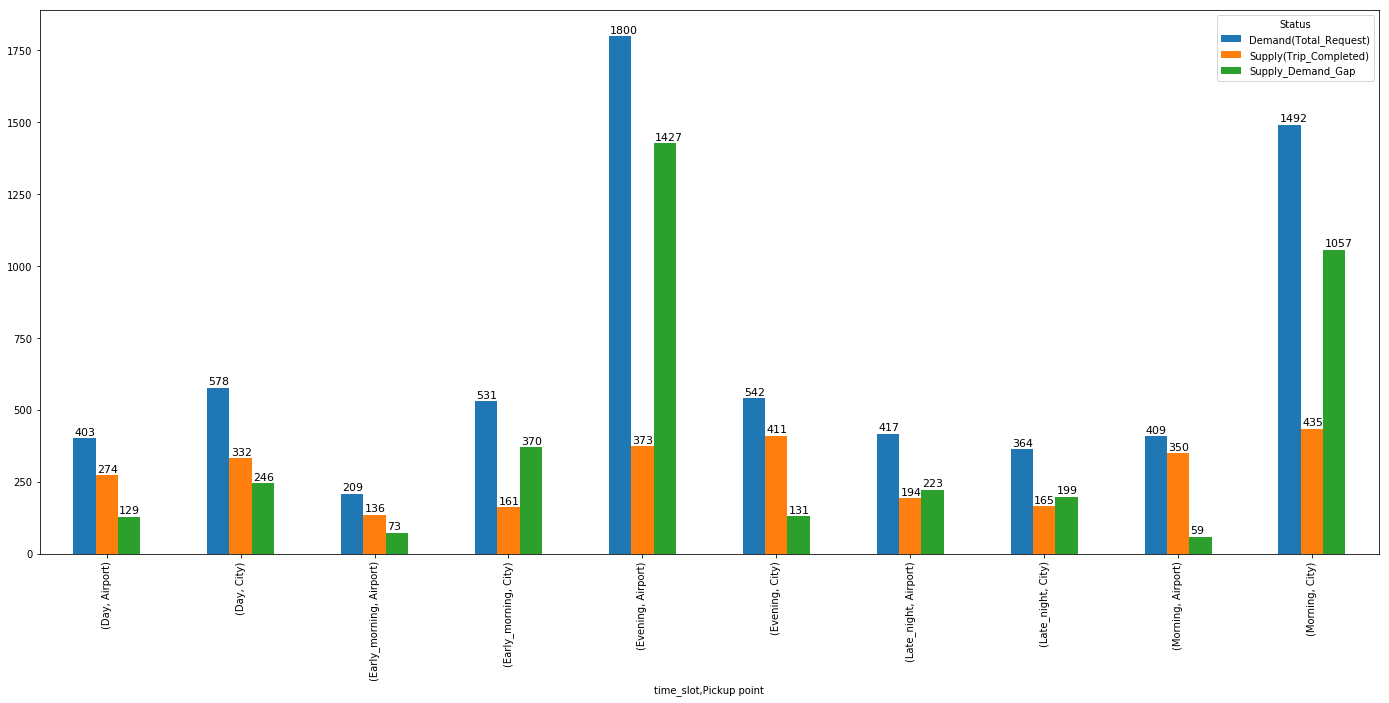

In [26]:
# Plot for supply-demand gap for different time slots
fig,ax = plt.subplots(figsize=(24,10))
supply_demand_pickup.plot(kind="bar", ax=ax)

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+10,int(i.get_height()), fontsize=11)
    
plt.show()

## From the above calculation and plots we found that:
#### 1. Supply-Demand gap is very high when compared to total demand during
        a) Morning(6am-10am) time slot and
        b) Evening(5pm-9pm)time slot as compared to other time slot

#### 2. Supply-Demand gap is most severe 
        a) When type of request is from City-Airport during Morning (6am-10am) time slot
        b) When type of request is from Airport-City during Evening (5pm-9pm) time slot 

## Separate plots for identified problems

### Supply-demand for Morning time slot from City

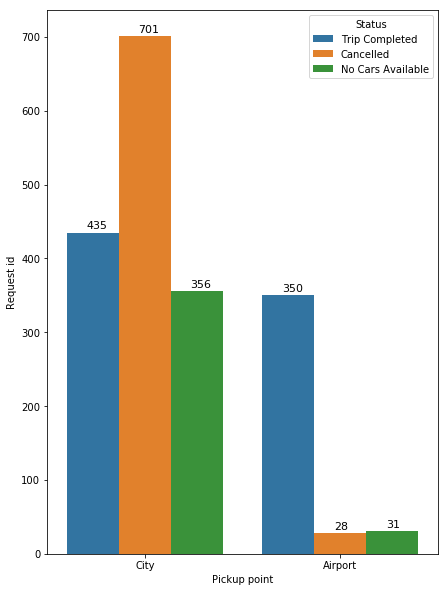

In [27]:
# Pickup point - City and time-slot - Morning(6am-10am)
city_morning = uber[uber['time_slot'] == 'Morning']

# Plot for supply-demand gap for Morning
plt.figure(figsize=(7,10))
ax = sns.barplot(x ='Pickup point', y ='Request id', hue='Status', data=city_morning, estimator=lambda req_id: len(req_id))

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+5,int(i.get_height()), fontsize=11)
    
plt.show()

### Supply-Demand for Evening time slot from the Airport

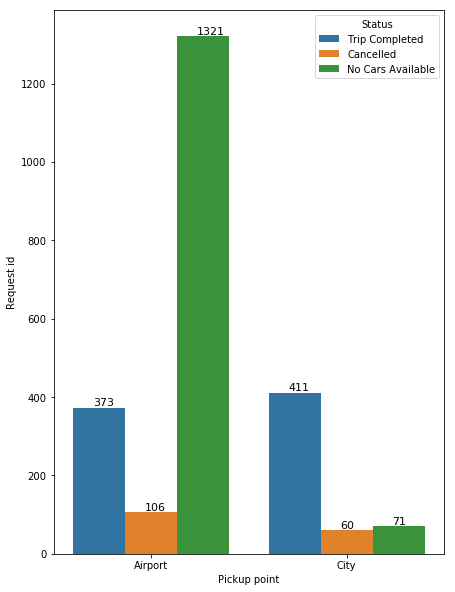

In [28]:
# Pickup point - Airport and time-slot - Evening(5pm-9pm)
airport_evening = uber[uber['time_slot'] == 'Evening']

# Plot for supply-demand gap for Evening
plt.figure(figsize=(7,10))
ax = sns.barplot(x ='Pickup point', y ='Request id', hue='Status', data=airport_evening, estimator=lambda req_id: len(req_id))

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+5,int(i.get_height()), fontsize=11)
    
plt.show()

### Severity of Problem faced by Uber

#### Piechart is used to show percentage of each Status

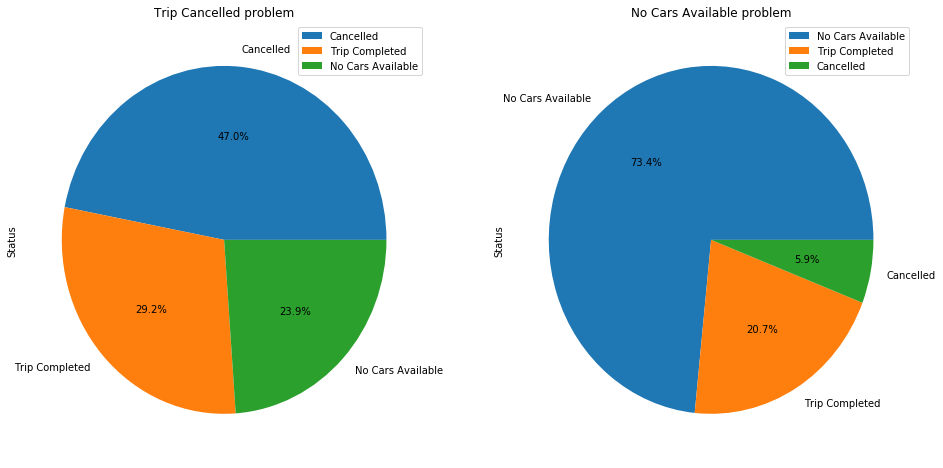

In [29]:
# Pie chart showing % of different status of trip
fig,ax = plt.subplots(1,2, figsize=(16,8))

# For Cancelled Trip in Morning time slot and City as Pickup point 
city_morning = uber[(uber['time_slot'] == 'Morning') & (uber['Pickup point'] == 'City')]
city_morning_count = pd.DataFrame(city_morning['Status'].value_counts())

# Plot
city_morning_count.plot(kind='pie', y='Status', ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Trip Cancelled problem')


# For No Cars Available in Evening time slot and Airport as Pickup point
airport_evening = uber[(uber['time_slot'] == 'Evening') & (uber['Pickup point'] == 'Airport')]
airport_evening_count = pd.DataFrame(airport_evening['Status'].value_counts())

# Plot
airport_evening_count.plot(kind='pie',y='Status', ax=ax[1],autopct='%1.1f%%')
ax[1].set_title('No Cars Available problem')

plt.show()